In [1]:
import pandas as pd
import numpy as np
from numpy import mean, std

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('E:/Imarticus/Semester 2/Machine learning Python/Sir Notes/indian_liver_patient.csv')

In [4]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [6]:
df.Dataset.value_counts()

1    416
2    167
Name: Dataset, dtype: int64

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Alamine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
Albumin_and_Globulin_Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
Dataset,583.0,1.286449,0.452490,1.0,1.0,1.00,2.0,2.0


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

**Outlier Detection using Z score**\
z = (x - mean())/std()\
Any record with z value greater than 3 are outliers.

In [9]:
Total_Bilirubin = (df.Total_Bilirubin - df.Total_Bilirubin.mean())/df.Total_Bilirubin.std() 

In [10]:
df.iloc[((Total_Bilirubin[Total_Bilirubin > 3].index) | (Total_Bilirubin[Total_Bilirubin > 3].index)) , 2]


120    23.0
121    22.7
166    75.0
168    22.8
199    27.2
259    30.5
311    23.2
370    22.6
447    23.3
504    30.5
505    32.6
519    26.3
531    30.8
547    27.7
559    42.8
565    22.5
575    25.0
Name: Total_Bilirubin, dtype: float64

In [11]:
direct_br = (df.Direct_Bilirubin - df.Direct_Bilirubin.mean())/df.Direct_Bilirubin.std()
direct_br_index = direct_br[(direct_br > 3) | (direct_br < -3)].index.values

In [12]:
len(direct_br_index)

19

In [13]:
df.loc[direct_br_index,:].groupby('Dataset')['Dataset'].count()

Dataset
1    19
Name: Dataset, dtype: int64

<AxesSubplot:xlabel='Dataset', ylabel='Direct_Bilirubin'>

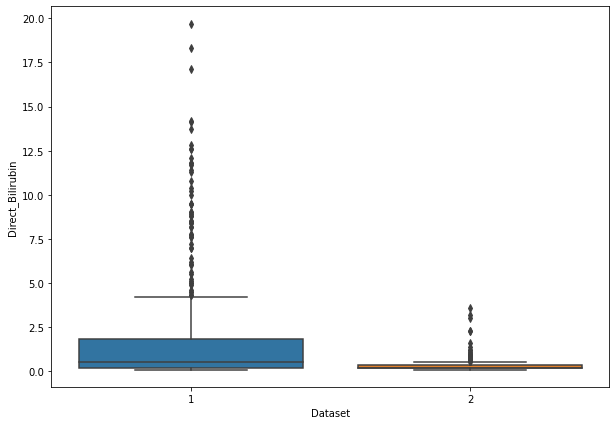

In [14]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Dataset', y = 'Direct_Bilirubin', data = df)

In [15]:
df1 = df.copy(deep = True)

In [16]:
outlier_cols = list(df.columns[2:-1].values)
outlier_cols

['Total_Bilirubin',
 'Direct_Bilirubin',
 'Alkaline_Phosphotase',
 'Alamine_Aminotransferase',
 'Aspartate_Aminotransferase',
 'Total_Protiens',
 'Albumin',
 'Albumin_and_Globulin_Ratio']

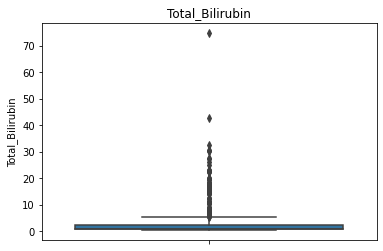

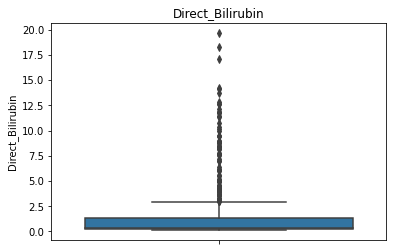

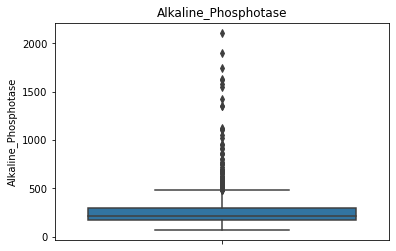

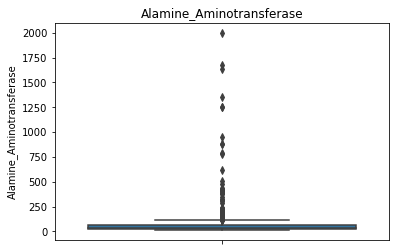

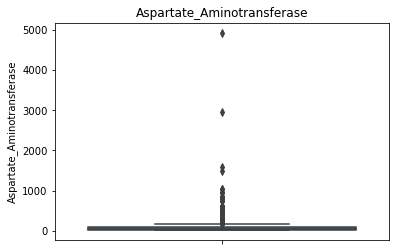

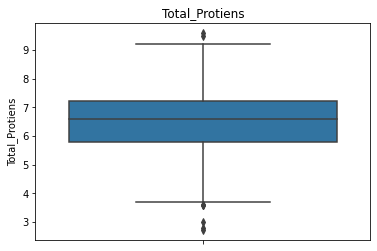

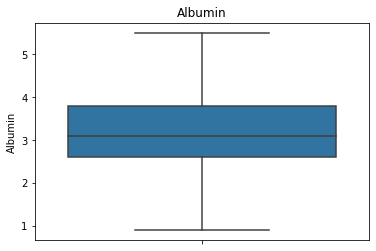

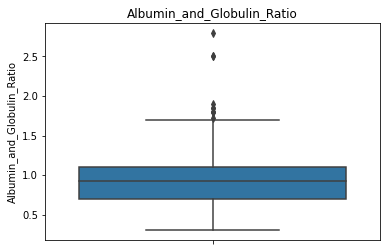

In [17]:
for cols in outlier_cols:
    sns.boxplot(y = cols, data = df)
    plt.title(cols)
    plt.show()

## Treating the Outliers using defined function

In [18]:
def outlier_detection(data,name):
    per_25,per_75 = data.quantile([.25,.75])
    iqr = per_75 - per_25
    ul = per_75 + (iqr * 1.5)
    ll = per_25 - (iqr * 1.5)
    outliers = data[(data < ll) | (data > ul)]
    class_count = df.loc[outliers.index.values,:].groupby('Dataset')[name].min()
    df.loc[outliers.index.values, name] = df.loc[outliers.index.values, 'Dataset'].apply(lambda x: class_count.loc[x])

In [19]:
for col in outlier_cols:
    outlier_detection(df[col], col)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Age'),
  Text(1, 0, 'Total_Bilirubin'),
  Text(2, 0, 'Direct_Bilirubin'),
  Text(3, 0, 'Alkaline_Phosphotase'),
  Text(4, 0, 'Alamine_Aminotransferase'),
  Text(5, 0, 'Aspartate_Aminotransferase'),
  Text(6, 0, 'Total_Protiens'),
  Text(7, 0, 'Albumin'),
  Text(8, 0, 'Albumin_and_Globulin_Ratio'),
  Text(9, 0, 'Dataset')])

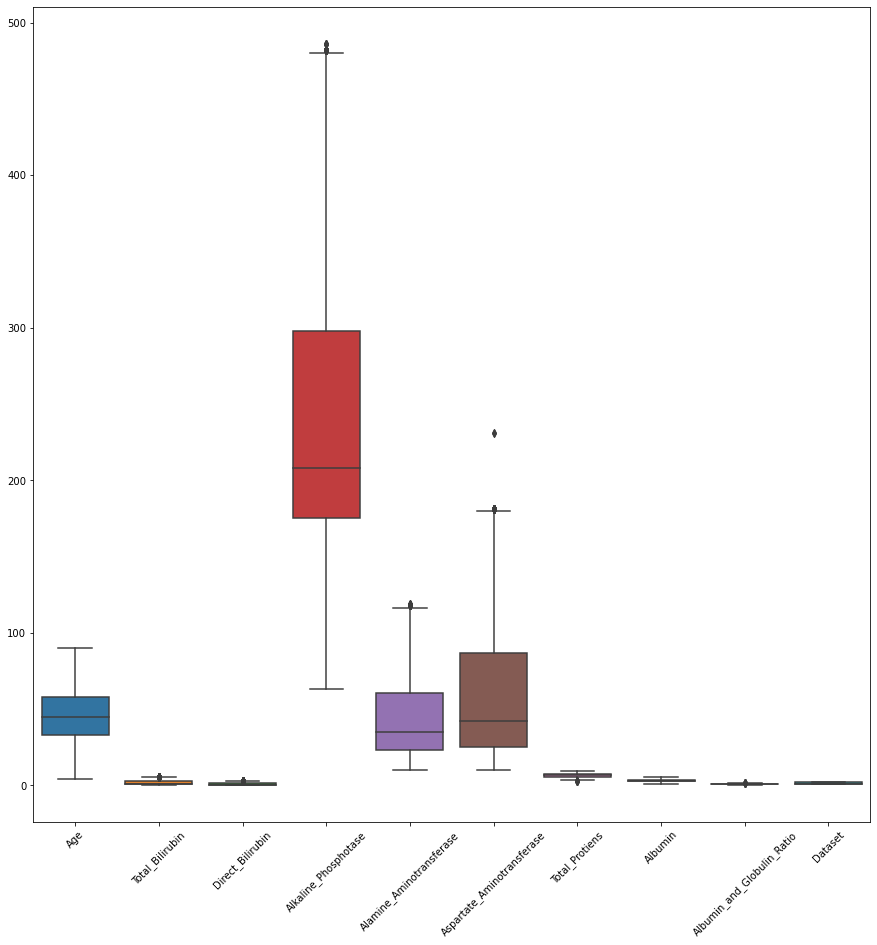

In [20]:
plt.figure(figsize = (15,15))
sns.boxplot(data = df)
plt.xticks(rotation = 45)

## Trearting missing value

In [21]:
miss_values = df.isnull().sum()
miss_values[miss_values > 0]

Albumin_and_Globulin_Ratio    4
dtype: int64

In [22]:
df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].median(),inplace=True)

In [23]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [24]:
df.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.095758,0.093081,0.038220,-0.073553,-0.040856,-0.170040,-0.265924,-0.222370,-0.137351
Total_Bilirubin,0.095758,1.000000,0.983000,0.359853,0.435601,0.529269,-0.059967,-0.303365,-0.320986,-0.304432
Direct_Bilirubin,0.093081,0.983000,1.000000,0.366640,0.431333,0.527979,-0.042129,-0.291684,-0.323249,-0.311145
Alkaline_Phosphotase,0.038220,0.359853,0.366640,1.000000,0.380024,0.305503,0.006743,-0.172382,-0.298781,-0.236556
Alamine_Aminotransferase,-0.073553,0.435601,0.431333,0.380024,1.000000,0.785477,0.004254,-0.033164,-0.079621,-0.287068
Aspartate_Aminotransferase,-0.040856,0.529269,0.527979,0.305503,0.785477,1.000000,-0.026694,-0.160770,-0.163086,-0.288802
Total_Protiens,-0.170040,-0.059967,-0.042129,0.006743,0.004254,-0.026694,1.000000,0.732810,0.234622,0.050736
Albumin,-0.265924,-0.303365,-0.291684,-0.172382,-0.033164,-0.160770,0.732810,1.000000,0.730678,0.161388
Albumin_and_Globulin_Ratio,-0.222370,-0.320986,-0.323249,-0.298781,-0.079621,-0.163086,0.234622,0.730678,1.000000,0.181247
Dataset,-0.137351,-0.304432,-0.311145,-0.236556,-0.287068,-0.288802,0.050736,0.161388,0.181247,1.000000


<AxesSubplot:>

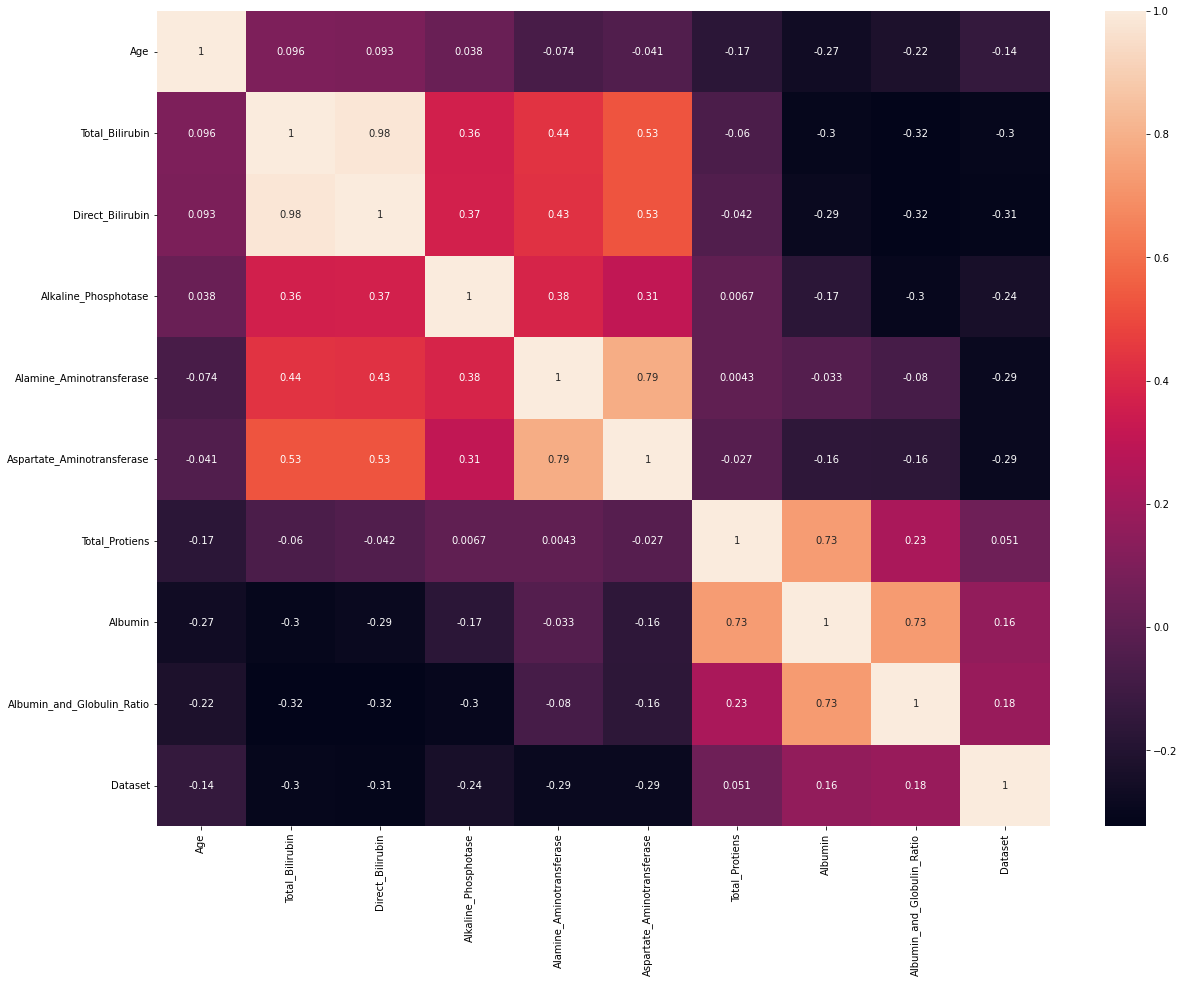

In [25]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), annot = True)

**Lets convert age column to categorical column**

In [26]:
df.Age.describe()

count    583.000000
mean      44.746141
std       16.189833
min        4.000000
25%       33.000000
50%       45.000000
75%       58.000000
max       90.000000
Name: Age, dtype: float64

In [27]:
df['Age_cat'] = pd.cut(df['Age'], bins = [0,30,60,91], labels = ['young','middle','old'])

In [28]:
df.groupby(['Age_cat', 'Dataset'])['Dataset'].size()

Age_cat  Dataset
young    1           64
         2           51
middle   1          280
         2           89
old      1           72
         2           27
Name: Dataset, dtype: int64

**Let us drop the age**

In [29]:
df.drop('Age', axis = 1, inplace = True)

**Let us convert the categorical variables to numerical variable**

In [30]:
df = pd.get_dummies(df, drop_first = True )

## MODEL BUILDING

### Logistic Regression

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [32]:
X = df.drop('Dataset', axis =1)
y = df['Dataset']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state = 1234)

In [34]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred = lr.predict(X_test)

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.77      0.95      0.85        86
           2       0.64      0.23      0.33        31

    accuracy                           0.76       117
   macro avg       0.70      0.59      0.59       117
weighted avg       0.74      0.76      0.72       117



### Random Forest

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [38]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [40]:
rf.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [41]:
pred_values=rf.predict(X_test_scaled)

In [42]:
cm1=confusion_matrix(y_test,pred_values)
cm1

array([[75, 11],
       [18, 13]], dtype=int64)

In [43]:
print(classification_report(y_test,pred_values))

              precision    recall  f1-score   support

           1       0.81      0.87      0.84        86
           2       0.54      0.42      0.47        31

    accuracy                           0.75       117
   macro avg       0.67      0.65      0.66       117
weighted avg       0.74      0.75      0.74       117



### KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
score = []
k_values = list(range(3,12))
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    score.append(accuracy_score(y_test, y_pred))

In [46]:
print(score)

[0.7350427350427351, 0.7863247863247863, 0.7606837606837606, 0.7435897435897436, 0.7692307692307693, 0.7777777777777778, 0.7863247863247863, 0.7692307692307693, 0.7777777777777778]


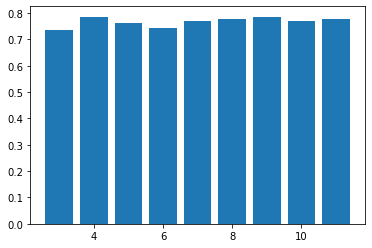

In [47]:
plt.bar(k_values, score)
plt.show()

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.82      0.90      0.86        86
           2       0.61      0.45      0.52        31

    accuracy                           0.78       117
   macro avg       0.71      0.67      0.69       117
weighted avg       0.76      0.78      0.77       117



In [49]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train_scaled, y_train)
y_knn_pred = knn.predict(X_test_scaled)

In [50]:
print(classification_report(y_test,y_knn_pred))

              precision    recall  f1-score   support

           1       0.80      0.93      0.86        86
           2       0.65      0.35      0.46        31

    accuracy                           0.78       117
   macro avg       0.72      0.64      0.66       117
weighted avg       0.76      0.78      0.75       117



In [51]:
confusion_matrix(y_test,y_knn_pred)

array([[80,  6],
       [20, 11]], dtype=int64)

### Naive Bayes

In [52]:
from sklearn.naive_bayes import GaussianNB

In [53]:
nb = GaussianNB()

In [54]:
nb.fit(X_train_scaled, y_train)
nb_pred = nb.predict(X_test_scaled)

In [55]:
confusion_matrix(y_test,nb_pred)

array([[46, 40],
       [ 4, 27]], dtype=int64)

In [56]:
print(classification_report(y_test,nb_pred))

              precision    recall  f1-score   support

           1       0.92      0.53      0.68        86
           2       0.40      0.87      0.55        31

    accuracy                           0.62       117
   macro avg       0.66      0.70      0.61       117
weighted avg       0.78      0.62      0.64       117



### Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
dt = DecisionTreeClassifier()

In [59]:
dt.fit(X_train_scaled, y_train)
dt_pred = dt.predict(X_test_scaled)

In [60]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           1       0.76      0.76      0.76        86
           2       0.34      0.35      0.35        31

    accuracy                           0.65       117
   macro avg       0.55      0.56      0.55       117
weighted avg       0.65      0.65      0.65       117



## MultiCollinearity

In [61]:
vcorr=df.corr()

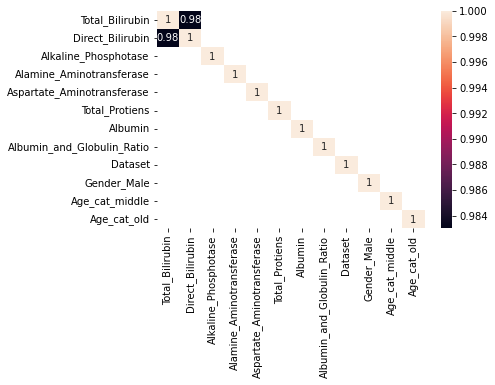

In [62]:
sns.heatmap(vcorr[(vcorr<-0.85) | (vcorr>0.85)],annot=True)
plt.show()

In [63]:
X.drop('Direct_Bilirubin', axis = 1, inplace = True)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state = 1234)

In [65]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

## Logistic Regression after Multicollinearity

In [66]:
lr.fit(X_train, y_train)

LogisticRegression()

In [67]:
lr_pred = lr.predict(X_test)

In [68]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           1       0.78      0.97      0.86        86
           2       0.70      0.23      0.34        31

    accuracy                           0.77       117
   macro avg       0.74      0.60      0.60       117
weighted avg       0.76      0.77      0.72       117



## Random Forest after Multicollinearity

In [69]:
rf.fit(X_train_scaled,y_train)
pred_values=rf.predict(X_test_scaled)

In [70]:
print(classification_report(y_test,pred_values))

              precision    recall  f1-score   support

           1       0.80      0.91      0.85        86
           2       0.60      0.39      0.47        31

    accuracy                           0.77       117
   macro avg       0.70      0.65      0.66       117
weighted avg       0.75      0.77      0.75       117



## KNN after Multicollinearity

In [77]:
score = {}
k_values = list(range(3,12))
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    knn_pred = knn.predict(X_test_scaled)
    score[k] = (accuracy_score(y_test, y_pred).round(2))

In [78]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           1       0.81      0.92      0.86        86
           2       0.65      0.42      0.51        31

    accuracy                           0.79       117
   macro avg       0.73      0.67      0.69       117
weighted avg       0.77      0.79      0.77       117



## SVC

In [79]:
from sklearn.svm import SVC

In [114]:
svc = SVC(kernel = 'sigmoid')

In [115]:
svc.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [116]:
svc_pred = svc.predict(X_test)

In [117]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           1       0.66      0.64      0.65        86
           2       0.09      0.10      0.09        31

    accuracy                           0.50       117
   macro avg       0.38      0.37      0.37       117
weighted avg       0.51      0.50      0.50       117



## PCA

In [118]:
from sklearn.decomposition import PCA

In [121]:
pca = PCA(random_state = 1234)
X_scaled = sc.fit_transform(X)

In [126]:
pca_comp = pca.fit_transform(X_scaled)

In [127]:
np.cumsum(pca.explained_variance_ratio_)

array([0.28718052, 0.48992871, 0.63644936, 0.73996223, 0.8223012 ,
       0.88634293, 0.93659567, 0.97369493, 0.99327186, 1.        ])

In [129]:
df_pca = pd.DataFrame(pca_comp[:,:8], columns = ['PC'+str(i) for i in range(8)])

In [130]:
df_pca.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-1.836036,1.777154,1.377772,1.656331,0.571405,0.658220,0.089696,-0.688113
1,1.934607,0.123177,2.918164,1.240124,-1.647421,0.265755,0.976419,-0.283485
2,1.501847,0.322248,2.805387,0.996068,-1.561330,-0.132936,1.503761,-0.297512
3,-1.273402,-0.028080,-1.035882,-0.634730,-0.768787,0.163931,-0.085135,-0.187779
4,0.736685,2.045744,1.658853,0.522732,-1.311686,2.026370,-0.189368,-0.133801


In [133]:
X_train, X_test, y_train, y_test = train_test_split(df_pca,y, test_size = .20, random_state = 1234)

In [134]:
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [135]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           1       0.78      0.94      0.85        86
           2       0.62      0.26      0.36        31

    accuracy                           0.76       117
   macro avg       0.70      0.60      0.61       117
weighted avg       0.74      0.76      0.72       117

